In [1]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colorbar as colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm
import numpy as np
import polars as pl
import pandas as pd
import datetime
import json
import polyline

pl.Config.set_tbl_cols(100) 
pl.Config.set_tbl_width_chars(150)

polars.config.Config

In [2]:
%config InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'

In [3]:
df = pl.DataFrame({
    "Model": ["Neural Network Model", "Dekalb Transit Predictions"],
    "R² Score": [0.9632, -0.7194],
    "Interpretation": [
        "Excellent fit - explains most of the variance",
        "Very poor - worse than a simple mean prediction"
    ]
})
for row in df.rows(named=True):
    print(f"{row['Model']:<25} | R² = {row['R² Score']:.4f} | {row['Interpretation']}")

Neural Network Model      | R² = 0.9632 | Excellent fit - explains most of the variance
Dekalb Transit Predictions | R² = -0.7194 | Very poor - worse than a simple mean prediction


In [4]:
#Load patterns data
pattern_mapping = {
    3: "2L",
    4: "2R",
    37: "3",
    17: "10",
    18: "11",
    23: "12",
    12: "16",
    13: "17",
    14: "18",
    33: "19",
    46: "21",
    45: "21 Tripper",
}

# Load patterns json
file = open("../data/patterns.json", "r")
patternsData = json.load(file)

patterns = pl.DataFrame(patternsData['get_patterns'])
patterns = patterns.with_columns(pl.col("id").replace_strict(pattern_mapping, default="None"))
patterns

id,name,extID,type,length,color,encLine,decLine,routes,routeNames,stations,stopIDs
str,str,str,i64,f64,str,str,list[null],list[i64],list[str],list[null],list[i64]
"""2L""","""Route 2L (Full Service)""","""2""",2,5.156097,"""#097138""","""eq}~Fxix|OM?a@@}A??fE?nEAbE?h@…",[],[3],"[""Route 2L""]",[],"[433, 465, … 820]"
"""2R""","""Route 2R Full Service""","""1""",1,5.083211,"""#FFD600""","""qk}~Fn{x|Ow@C{BhAoBp@Em@G}G@_I…",[],[4],"[""Route 2R""]",[],"[431, 451, … 432]"
"""3""","""Route 3 Full Service""","""3""",2,2.793036,"""#58F964""","""kq}~Fxix|Oa@??@sA?@?C?A}C???aC…",[],[33],"[""Route 3""]",[],"[431, 493, … 431]"
"""10""","""Route 10 Full Service""","""10""",3,5.564219,"""#782BC9""","""{q}~Fxix|OuBACfF@jH@xClFkBj@Sj…",[],[17],"[""Route 10""]",[],"[477, 432, … 431]"
"""11""","""Route 11 Full Service""","""11""",2,12.793737,"""#A07D5C""","""mq}~F~ix|O}A?QECKEaPAoACmQGGeR…",[],[18],"[""Route 11""]",[],"[492, 431, … 491]"
…,…,…,…,…,…,…,…,…,…,…,…
"""17""","""Route 17 Full Service""","""17""",2,11.542563,"""#3E5BA6""","""ap}~Fjkx|OHOAYQGu@B_B?K}]?_M`B…",[],[13],"[""Route 17""]",[],"[805, 806, … 805]"
"""18""","""Route 18 Full Service""","""18""",4,14.597877,"""#FFAA00""","""}i`_G|no|OoA}Aa@]gAKCB[~BUp@c@…",[],[14],"[""Route 18""]",[],"[676, 835, … 685]"
"""19""","""Route 19 Full Service""","""19""",4,21.596067,"""#34ADE0""","""cm}~Fj_y|Ol@CRUFW?_@??ESOQ??WI…",[],[30],"[""Route 19""]",[],"[819, 528, … 819]"


In [5]:
#Load stops data
file = open("../data/stops.json", "r")
stopsData = json.load(file)

stops = pl.DataFrame(stopsData['get_stops'])

rid,rsid,id,name,lat,lng,extID,shortName
i64,i64,i64,str,f64,f64,str,str
3,197057,449,"""Anderson Hall""",41.938465,-88.761086,"""449""","""449"""
3,197056,448,"""Barsema Hall""",41.939774,-88.761009,"""448""","""448"""
3,197054,446,"""Castle Dr. at College Ave.""",41.93412,-88.763115,"""446""","""446"""
3,197053,445,"""Castle Dr. at Montgomery""",41.9324,-88.762863,"""445""","""445"""
3,197044,436,"""Convocation Center Entrance 3""",41.936459,-88.785286,"""436""","""436"""
…,…,…,…,…,…,…,…
38,2491136,768,"""Maple St. at DeKalb County Cou…",41.989391,-88.685707,"""""","""DCC"""
38,2491159,791,"""Meijer Grocery Store (On Deman…",41.98642,-88.711739,"""""","""MGS"""
38,2491157,789,"""Thornwood Dr. & Prairie Rd.""",41.972488,-88.698242,"""""","""PRd"""


In [6]:
two_l_pattern = patterns.filter(pl.col("id") == "2L")
two_l_stops = two_l_pattern.select("stopIDs").to_series()[0]

""
i64
433
465
466
467
468
…
448
449
450


In [7]:
# Get full stops data
stops_df = stops.select([
    pl.col("id").alias("stop_id"),
    pl.col("name").cast(pl.Utf8).alias("stop_name"),
    pl.col("lat"),
    pl.col("lng")
])

# Filter stops to only include the Route 2L stops
stops_filtered = stops_df.filter(pl.col("stop_id").is_in(two_l_stops))

# Reorder them by the route pattern
ordered_stops = pl.DataFrame([
    stops_filtered.filter(pl.col("stop_id") == sid).to_dicts()[0]
    for sid in two_l_stops
    if sid in stops_filtered["stop_id"].to_list()
])

stop_id,stop_name,lat,lng
i64,str,f64,f64
433,"""Lincoln Hall""",41.936333,-88.774391
465,"""Stadium Dr. at New Hall""",41.937874,-88.775536
466,"""Grant North""",41.938599,-88.777321
467,"""Stevenson North""",41.937897,-88.78006
468,"""Stevenson South""",41.936558,-88.781105
…,…,…,…
448,"""Barsema Hall""",41.939774,-88.761009
449,"""Anderson Hall""",41.938465,-88.761086
450,"""Health Services on Lucinda Ave…",41.936481,-88.764244


In [8]:
stop_pos = {row["stop_name"]: (row["lng"], row["lat"]) for row in ordered_stops.to_dicts()}

{'Lincoln Hall': (-88.7743911743164, 41.93633270263672),
 'Stadium Dr. at New Hall': (-88.7755355834961, 41.93787384033203),
 'Grant North': (-88.7773208618164, 41.9385986328125),
 'Stevenson North': (-88.78005981445312, 41.937896728515625),
 'Stevenson South': (-88.7811050415039, 41.93655776977539),
 'Convocation Center Entrance 3': (-88.78528594970703, 41.936458587646484),
 'Lot C3 at Presidents Blvd': (-88.78742980957031, 41.93645095825195),
 'Norther View Circle': (-88.78799438476562, 41.93968200683594),
 'Lincoln Hwy. at High Meadows': (-88.77953338623047, 41.930633544921875),
 'Lincoln Hwy. at Culvers': (-88.77767944335938, 41.930702209472656),
 'Lincoln Hwy. at Precision Auto Wash': (-88.77495574951172,
  41.930763244628906),
 'Lincoln Hwy. at CVS Pharmacy': (-88.77217864990234, 41.93092346191406),
 'Lincoln Hwy. at Pizza Villa': (-88.7693862915039, 41.93101501464844),
 'Lincoln Hwy. at Psychology Building': (-88.76588439941406,
  41.93101501464844),
 'Castle Dr. at Montgomery':

In [9]:
#Map route id to correct route name
route_mapping = {
    3: "2L",
    4: "2R",
    33: "3",
    17: "10",
    18: "11",
    23: "12",
    12: "16",
    13: "17",
    14: "18",
    30: "19",
    29: "21",
    38: "21 Tripper",
    777: "777"
}


df = pl.read_parquet("../data/2024-09-entries.parquet")
df = df.with_columns(pl.col("routeID").replace_strict(route_mapping))

routeID,patternID,equipmentID,tripID,lat,lng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64
"""777""",33,"""1001""",null,41.93536,-88.77044,0,0,4,0,0,-1,0,197,491,11402,"""NIS""",false,null,0,2024-08-31 23:59:49,"""35467605078ef4d""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,13
"""777""",9998,"""1002""",null,41.93484,-88.72824,0,0,9,0,0,-1,0,78,0,0,"""NIS""",false,null,0,2024-08-31 15:14:57,"""3546760508796c6""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,14
"""777""",0,"""1003""",null,41.93277,-88.76676,0,0,0,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-30 04:47:18,"""3546760504518c0""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,15
"""777""",9998,"""1004""",null,41.93481,-88.7283,0,0,15,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-31 09:43:05,"""35467605056be89""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,16
"""777""",9998,"""1101""",null,41.93486,-88.7282,0,0,0,125,0,-1,0,351,0,0,"""NIS""",false,null,0,2024-08-31 05:17:48,"""3546760504edeed""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,17
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""777""",9998,"""901""",null,41.9488,-88.77107,0,0,56,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-09-30 23:59:48,"""3546760505620da""",2024-09-30 23:59:57,null,-1,-1,-1,null,false,33868
"""777""",3,"""902""",null,41.93453,-88.72775,0,16,192,0,0,-1,0,356,0,0,"""NIS""",false,null,0,2024-09-30 16:40:25,"""354676050c652c9""",2024-09-30 23:59:57,null,-1,-1,-1,null,false,33869
"""18""",9998,"""904""",null,41.93484,-88.72816,0,0,126,0,0,-1,0,32,683,10662,"""NIS""",false,null,0,2024-09-30 23:59:49,"""35467605084242c""",2024-09-30 23:59:57,null,-1,-1,-1,null,false,33870


In [10]:
stops.rename({"id": "nextStopID"}).select(["nextStopID", "name"]).unique().sort("nextStopID")

#Left join stops to get stop names for nextStopID and lastStopID
df = df.join(stops.rename({"id": "nextStopID"}).select(["nextStopID", "name"]).unique(), on="nextStopID", how="left").rename({"name": "nextStopName"})
df = df.join(stops.rename({"id": "lastStopID"}).select(["lastStopID", "name"]).unique(), on="lastStopID", how="left").rename({"name": "lastStopName"})


routeID,patternID,equipmentID,tripID,lat,lng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__,nextStopName,lastStopName
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64,str,str
"""777""",33,"""1001""",null,41.93536,-88.77044,0,0,4,0,0,-1,0,197,491,11402,"""NIS""",false,null,0,2024-08-31 23:59:49,"""35467605078ef4d""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,13,null,"""Normal Rd. at Northern Lane"""
"""777""",9998,"""1002""",null,41.93484,-88.72824,0,0,9,0,0,-1,0,78,0,0,"""NIS""",false,null,0,2024-08-31 15:14:57,"""3546760508796c6""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,14,null,null
"""777""",0,"""1003""",null,41.93277,-88.76676,0,0,0,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-30 04:47:18,"""3546760504518c0""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,15,null,null
"""777""",9998,"""1004""",null,41.93481,-88.7283,0,0,15,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-31 09:43:05,"""35467605056be89""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,16,null,null
"""777""",9998,"""1101""",null,41.93486,-88.7282,0,0,0,125,0,-1,0,351,0,0,"""NIS""",false,null,0,2024-08-31 05:17:48,"""3546760504edeed""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,17,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""777""",9998,"""901""",null,41.9488,-88.77107,0,0,56,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-09-30 23:59:48,"""3546760505620da""",2024-09-30 23:59:57,null,-1,-1,-1,null,false,33868,null,null
"""777""",3,"""902""",null,41.93453,-88.72775,0,16,192,0,0,-1,0,356,0,0,"""NIS""",false,null,0,2024-09-30 16:40:25,"""354676050c652c9""",2024-09-30 23:59:57,null,-1,-1,-1,null,false,33869,null,null
"""18""",9998,"""904""",null,41.93484,-88.72816,0,0,126,0,0,-1,0,32,683,10662,"""NIS""",false,null,0,2024-09-30 23:59:49,"""35467605084242c""",2024-09-30 23:59:57,null,-1,-1,-1,null,false,33870,null,"""Rt 23 at Verizon"""


In [11]:
#Filter out the subset of data we want to work with
df = df.filter(
    (pl.col("inService"))
)

#Add stopChanged column
df = df.with_columns(
    (
        (pl.col("lastStopID") == pl.col("nextStopID").shift(1)).over(
            "equipmentID", order_by="receiveTime"
        )
    ).alias("stopChanged")
)

df = df.filter(pl.col("stopChanged")).with_columns(
    (pl.col("nextStopID").shift(1) == pl.col("lastStopID"))
    .over("equipmentID", order_by="receiveTime")
    .alias("nextToLast")
)

#Add timeDiff column
df = df.with_columns(
    (-pl.col("receiveTime").diff(-1).over("equipmentID", order_by="receiveTime")).alias(
        "timeDiff"
    )
).filter(pl.col("nextToLast"))

df = df.filter(
    (pl.col("routeID") == "2L")
)


routeID,patternID,equipmentID,tripID,lat,lng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__,nextStopName,lastStopName,stopChanged,nextToLast,timeDiff
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64,str,str,bool,bool,duration[ns]
"""2L""",3,"""Old_1501""",329,41.93639,-88.7736,0,0,33,0,465,1145,10482,271,433,10481,"""19:00:00-2""",true,-2.0,11414,2024-09-01 00:04:41,"""354676050595540""",2024-09-01 00:04:48,"""Outbound""",4,433,465,0.0,true,538,"""Stadium Dr. at New Hall""","""Lincoln Hall""",true,true,40s
"""2L""",3,"""Old_1501""",329,41.93746,-88.7754,0,0,33,0,466,1146,10483,0,465,10482,"""19:00:00-2""",true,-2.0,11414,2024-09-01 00:05:21,"""354676050595540""",2024-09-01 00:05:33,"""Outbound""",5,465,466,0.0,true,619,"""Grant North""","""Stadium Dr. at New Hall""",true,true,1m
"""2L""",3,"""Old_1501""",329,41.93859,-88.77699,0,0,33,0,467,1147,10484,270,466,10483,"""19:00:00-2""",true,-2.0,11414,2024-09-01 00:06:21,"""354676050595540""",2024-09-01 00:06:34,"""Outbound""",6,466,467,0.0,true,727,"""Stevenson North""","""Grant North""",true,true,1m 20s
"""2L""",3,"""Old_1501""",329,41.93785,-88.77995,0,0,33,0,468,1148,10485,270,467,10484,"""19:00:00-2""",true,-2.0,11414,2024-09-01 00:07:41,"""354676050595540""",2024-09-01 00:07:50,"""Outbound""",7,467,468,3.04295,true,862,"""Stevenson South""","""Stevenson North""",true,true,51s
"""2L""",3,"""Old_1501""",329,41.93645,-88.78108,0,0,33,0,436,1149,10486,182,468,10485,"""19:00:00-2""",true,-2.0,11414,2024-09-01 00:08:32,"""354676050595540""",2024-09-01 00:08:35,"""Outbound""",8,468,436,0.0,true,943,"""Convocation Center Entrance 3""","""Stevenson South""",true,true,40s
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2L""",3,"""1002""",null,41.93535,-88.76217,0,0,0,0,448,1133,10498,0,447,10497,"""18:30:00-2""",true,-1.0,11380,2024-09-30 23:50:25,"""3546760508796c6""",2024-09-30 23:50:38,"""Outbound""",20,447,448,0.0,true,32900,"""Barsema Hall""","""Gilbert Way at Art Building""",true,true,1m 51s
"""2L""",3,"""1002""",null,41.93949,-88.76099,0,0,0,0,449,1133,10499,0,448,10498,"""18:30:00-2""",true,0.0,11380,2024-09-30 23:52:16,"""3546760508796c6""",2024-09-30 23:52:23,"""Outbound""",21,448,449,0.0,true,33062,"""Anderson Hall""","""Barsema Hall""",true,true,1m
"""2L""",3,"""1002""",null,41.9379,-88.76104,0,0,0,0,450,1134,10500,180,449,10499,"""18:30:00-2""",true,0.0,11380,2024-09-30 23:53:16,"""3546760508796c6""",2024-09-30 23:53:24,"""Outbound""",22,449,450,0.0,true,33170,"""Health Services on Lucinda Ave…","""Anderson Hall""",true,true,1m


In [12]:
mega_df = pl.read_parquet("../data/mega_df.parquet").filter(
    (pl.col("routeID") == "2L") &
    (pl.col("inService"))
)


routeID,patternID,equipmentID,tripID,nextStopLat,nextStopLng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__,nextStopName,lat_right,lng_right,lastStopName,lastStopLat,lastStopLng,stopChanged,nextToLast,timeDiff,routeID_right,patternID_right,tripID_right,nextStopLat_right,nextStopLng_right,load_right,capacity_right,eLoad_right,blockID_right,nextStopID_right,nextStopETA_right,nextPatternStopID_right,h_right,lastStopID_right,lastPatternStopID_right,scheduleNumber_right,inService_right,onSchedule_right,trainID_right,aID_right,captureTime_right,direction_right,seq_right,lastStopExtID_right,nextStopExtID_right,nextStopPctProg_right,atStop_right,__index_level_0___right,nextStopName_right,lat_right_right,lng_right_right,lastStopName_right,lastStopLat_right,lastStopLng_right,stopChanged_right,nextToLast_right,timeDiff_right,receiveTime_right,nextStopID_actual,nextStopName_actual,eta,hour_of_day,minute_of_hour,day_of_week,eta_seconds,distance
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64,str,f64,f64,str,f64,f64,bool,bool,duration[ns],str,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,str,datetime[ns],cat,i64,i64,i64,f64,bool,i64,str,f64,f64,str,f64,f64,bool,bool,duration[ns],datetime[ns],i64,str,duration[ns],i8,i8,i8,i64,f32
"""2L""",3,"""Old_1501""",329,41.93639,-88.7736,0,0,33,0,465,1145,10482,271,433,10481,"""19:00:00-2""",true,-2.0,11414,2024-09-01 00:04:41,"""354676050595540""",2024-09-01 00:04:48,"""Outbound""",4,433,465,0.0,true,538,"""Stadium Dr. at New Hall""",41.937874,-88.775536,"""Lincoln Hall""",41.936333,-88.774391,true,true,40s,"""2L""",3,329,41.93746,-88.7754,0,0,33,0,466,1146,10483,0,465,10482,"""19:00:00-2""",true,-2.0,11414,"""354676050595540""",2024-09-01 00:05:33,"""Outbound""",5,465,466,0.0,true,619,"""Grant North""",41.938599,-88.777321,"""Stadium Dr. at New Hall""",41.937874,-88.775536,true,true,1m,2024-09-01 00:05:21,465,"""Stadium Dr. at New Hall""",40s,0,4,7,40,0.054808
"""2L""",3,"""1103""",330,41.93639,-88.77435,0,0,0,0,465,1175,10482,270,433,10481,"""19:30:00-2""",true,-2.0,11415,2024-09-01 00:34:35,"""35467605044c796""",2024-09-01 00:34:47,"""Outbound""",4,433,465,0.0,true,3745,"""Stadium Dr. at New Hall""",41.937874,-88.775536,"""Lincoln Hall""",41.936333,-88.774391,true,true,41s,"""2L""",3,330,41.93746,-88.7754,0,0,0,0,466,1176,10483,0,465,10482,"""19:30:00-2""",true,-2.0,11415,"""35467605044c796""",2024-09-01 00:35:18,"""Outbound""",5,465,466,0.0,true,3799,"""Grant North""",41.938599,-88.777321,"""Stadium Dr. at New Hall""",41.937874,-88.775536,true,true,50s,2024-09-01 00:35:16,465,"""Stadium Dr. at New Hall""",41s,0,34,7,41,0.004875
"""2L""",3,"""1103""",331,41.93638,-88.77397,0,0,8,0,465,1204,10482,270,433,10481,"""20:00:00-2""",true,-1.0,11416,2024-09-01 01:03:34,"""35467605044c796""",2024-09-01 01:03:47,"""Outbound""",4,433,465,0.0,true,6850,"""Stadium Dr. at New Hall""",41.937874,-88.775536,"""Lincoln Hall""",41.936333,-88.774391,true,true,51s,"""2L""",3,331,41.93746,-88.7754,0,0,8,0,466,1205,10483,0,465,10482,"""20:00:00-2""",true,-1.0,11416,"""35467605044c796""",2024-09-01 01:04:32,"""Outbound""",5,465,466,0.0,true,6931,"""Grant North""",41.938599,-88.777321,"""Stadium Dr. at New Hall""",41.937874,-88.775536,true,true,1m,2024-09-01 01:04:25,465,"""Stadium Dr. at New Hall""",51s,1,3,7,51,0.029283
"""2L""",3,"""1103""",332,41.93639,-88.77435,0,0,18,0,465,1234,10482,270,433,10481,"""20:30:00-2""",true,-1.0,11417,2024-09-01 01:33:46,"""35467605044c796""",2024-09-01 01:34:02,"""Outbound""",4,433,465,0.0,true,10090,"""Stadium Dr. at New Hall""",41.937874,-88.775536,"""Lincoln Hall""",41.936333,-88.774391,true,true,51s,"""2L""",3,332,41.93778,-88.77539,0,0,18,0,466,1235,10483,0,465,

In [13]:
preds = pl.read_parquet("../data/2024-09-preds.parquet")
preds = preds.with_columns(pl.col("routeID").replace_strict(route_mapping))

#Format the schedule time to be a datetime object
preds = preds.with_columns(
    pl.col('receiveTime').dt.convert_time_zone('America/Chicago'),
    pl.col('schedule').alias('scheduleStr'),
    pl.col('time').alias('timeStr'),
    pl.col('schedule').str.to_time(format='%I:%M%p', strict=False),
    pl.col('time').str.to_time(format='%I:%M%p', strict=False)
)

preds = preds.with_columns(pl.col('receiveTime').dt.combine(pl.col('time')).alias('time'),
                    pl.col('receiveTime').dt.combine(pl.col('schedule')).alias('schedule'))

#Correct for time columns hat are off by 24 hours
preds = preds.with_columns(
    pl.when(pl.col('time') - pl.col('receiveTime') > pl.duration(hours=12))
    .then(pl.col('time') - pl.duration(hours=24))
    .when(pl.col('time') - pl.col('receiveTime') < pl.duration(hours=-12))
    .then(pl.col('time') + pl.duration(hours=24))
    .otherwise(pl.col('time'))
    .alias('time')
)

#Correct for schedule times columns that are off by 24 hours
preds = preds.with_columns(
    pl.when(pl.col('schedule') - pl.col('receiveTime') > pl.duration(hours=12))
    .then(pl.col('schedule') - pl.duration(hours=24))
    .when(pl.col('schedule') - pl.col('receiveTime') < pl.duration(hours=-12))
    .then(pl.col('schedule') + pl.duration(hours=24))
    .otherwise(pl.col('schedule'))
    .alias('schedule')
)

preds = preds.filter(
    pl.col("routeID") == "2L"
)

stopID,patternStopID,timePoint,minutes,time,status,schedule,scheduleNumber,statuscolor,direction,equipmentID,routeID,receiveTime,captureTime,__index_level_0__,scheduleStr,timeStr
i64,i64,bool,i64,"datetime[μs, America/Chicago]",str,"datetime[μs, America/Chicago]",str,cat,cat,str,str,"datetime[ns, America/Chicago]",datetime[ns],i64,str,str
820,10502,false,0,2024-08-31 19:00:00 CDT,"""07:00PM""",2024-08-31 19:01:00 CDT,"""19:00:00-2""","""#cf1625""","""Outbound""","""Old_1501""","""2L""",2024-08-31 18:59:49 CDT,2024-09-01 00:00:01,35,"""07:01PM""","""07:00PM"""
433,10481,false,1,2024-08-31 19:01:00 CDT,"""07:01PM""",2024-08-31 19:02:00 CDT,"""19:00:00-2""","""#cf1625""","""Outbound""","""Old_1501""","""2L""",2024-08-31 18:59:49 CDT,2024-09-01 00:00:01,36,"""07:02PM""","""07:01PM"""
465,10482,false,2,2024-08-31 19:02:00 CDT,"""07:02PM""",2024-08-31 19:03:00 CDT,"""19:00:00-2""","""#cf1625""","""Outbound""","""Old_1501""","""2L""",2024-08-31 18:59:49 CDT,2024-09-01 00:00:01,37,"""07:03PM""","""07:02PM"""
466,10483,false,3,2024-08-31 19:03:00 CDT,"""07:03PM""",2024-08-31 19:04:00 CDT,"""19:00:00-2""","""#cf1625""","""Outbound""","""Old_1501""","""2L""",2024-08-31 18:59:49 CDT,2024-09-01 00:00:01,38,"""07:04PM""","""07:03PM"""
467,10484,true,4,2024-08-31 19:04:00 CDT,"""07:04PM""",2024-08-31 19:05:00 CDT,"""19:00:00-2""","""#cf1625""","""Outbound""","""Old_1501""","""2L""",2024-08-31 18:59:49 CDT,2024-09-01 00:00:01,39,"""07:05PM""","""07:04PM"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
820,10502,false,0,2024-09-30 19:00:00 CDT,"""07:00PM""",2024-09-30 19:01:00 CDT,"""19:00:00-2""","""#cf1625""","""Outbound""","""1002""","""2L""",2024-09-30 18:59:37 CDT,2024-09-30 23:59:57,98434,"""07:01PM""","""07:00PM"""
433,10481,false,1,2024-09-30 19:01:00 CDT,"""07:01PM""",2024-09-30 19:02:00 CDT,"""19:00:00-2""","""#cf1625""","""Outbound""","""1002""","""2L""",2024-09-30 18:59:37 CDT,2024-09-30 23:59:57,98435,"""07:02PM""","""07:01PM"""
465,10482,false,2,2024-09-30 19:02:00 CDT,"""07:02PM""",2024-09-30 19:03:00 CDT,"""19:00:00-2""","""#cf1625""","""Outbound""","""1002""","""2L""",2024-09-30 18:59:37 CDT,2024-09-30 23:59:57,98436,"""07:03PM""","""07:02PM"""


In [14]:
df = df.with_columns(
    pl.col("nextPatternStopID").alias("patternStopID")
)

#Join the subset on the triple key to get the correct prediction
predSet = df.join(
    preds,
    on=["equipmentID", "patternStopID", "captureTime"],
    how="inner"
)

predSet = predSet.with_columns(
    pl.col('receiveTime').dt.convert_time_zone('America/Chicago'),
)

predSet = predSet.with_columns(
    (pl.col("time") - pl.col("receiveTime")).alias("predictedDiff")
)

predSet["equipmentID", "lastStopName", "nextStopName", "timeDiff", "predictedDiff"]

equipmentID,lastStopName,nextStopName,timeDiff,predictedDiff
str,str,str,duration[ns],duration[μs]
"""Old_1501""","""Lincoln Hall""","""Stadium Dr. at New Hall""",40s,19s
"""Old_1501""","""Stadium Dr. at New Hall""","""Grant North""",1m,39s
"""Old_1501""","""Grant North""","""Stevenson North""",1m 20s,-21s
"""Old_1501""","""Stevenson North""","""Stevenson South""",51s,19s
"""Old_1501""","""Stevenson South""","""Convocation Center Entrance 3""",40s,28s
…,…,…,…,…
"""1002""","""Gilbert Way at Art Building""","""Barsema Hall""",1m 51s,2m 35s
"""1002""","""Barsema Hall""","""Anderson Hall""",1m,44s
"""1002""","""Anderson Hall""","""Health Services on Lucinda Ave…",1m,44s


In [15]:
predSet['predictedDiff'].describe()

statistic,value
str,str
"""count""","""35425"""
"""null_count""","""0"""
"""mean""","""0:00:22.791672"""
"""min""","""-1 day, 23:59:01"""
"""25%""","""-1 day, 23:59:57"""
"""50%""","""0:00:21"""
"""75%""","""0:00:46"""
"""max""","""0:04:46"""


In [16]:
#Compute mega_pred_set

mega_df = mega_df.with_columns(
    pl.col("nextStopID_actual").alias("nextStopID_ACTUAL")
)

mega_predset = mega_df.join(
    preds,
    left_on=["equipmentID", "captureTime", 'nextStopID_actual'],
    right_on=["equipmentID", "captureTime", 'stopID'],
    how="inner",
    suffix="_pred"
)

mega_predset = mega_predset.with_columns(
    pl.col('receiveTime').dt.convert_time_zone('America/Chicago'),
)

mega_predset = mega_predset.with_columns(
    (pl.col("time") - pl.col("receiveTime")).alias("predictedDiff")
)

mega_predset = mega_predset.filter(
    (pl.col("routeID") == "2L") &
    (pl.col("inService")) &
    (pl.col("timeDiff") < pl.duration(minutes=20)) 
)

mega_predset["equipmentID", "lastStopName", "nextStopName", "lastStopID", "nextStopID_actual", "timeDiff", "predictedDiff"]


equipmentID,lastStopName,nextStopName,lastStopID,nextStopID_actual,timeDiff,predictedDiff
str,str,str,i64,i64,duration[ns],duration[μs]
"""Old_1501""","""Lincoln Hall""","""Stadium Dr. at New Hall""",433,465,40s,19s
"""Old_1501""","""Lincoln Hall""","""Stadium Dr. at New Hall""",433,466,40s,1m 19s
"""Old_1501""","""Lincoln Hall""","""Stadium Dr. at New Hall""",433,467,40s,2m 19s
"""Old_1501""","""Lincoln Hall""","""Stadium Dr. at New Hall""",433,468,40s,3m 19s
"""Old_1501""","""Lincoln Hall""","""Stadium Dr. at New Hall""",433,436,40s,4m 19s
…,…,…,…,…,…,…
"""1002""","""Barsema Hall""","""Anderson Hall""",448,450,1m,1m 44s
"""1002""","""Barsema Hall""","""Anderson Hall""",448,431,1m,2m 44s
"""1002""","""Anderson Hall""","""Health Services on Lucinda Ave…",449,450,1m,44s


In [17]:
def to_ampm_label(hour_float):
    h = int(hour_float)
    m = int((hour_float % 1) * 60)
    t = datetime.datetime.strptime(f"{h:02}:{m:02}", "%H:%M")
    return t.strftime("%I:%M %p").lstrip("0")

In [42]:
#Try with model instead
import torch
import torch.nn as nn
import joblib
import numpy as np

#Model architecture
class ETANetwork(nn.Module):
    def __init__(self, input_size=6):
        super(ETANetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

model = ETANetwork()
model.load_state_dict(torch.load("../website/backend/data/eta_model.pth"))
model.eval()

label_encoders = joblib.load("../website/backend/data/label_encoders.pkl")
scaler_time = joblib.load("../website/backend/data/numerical_scaler.pkl")
scaler_eta = joblib.load("../website/backend/data/scaler_eta.pkl")

MinMaxScaler()

In [48]:
def predict_model_eta(row):
    try:
        encoded_route = label_encoders["routeID"].transform([row["routeID"]])[0]
        encoded_last = label_encoders["lastStopID"].transform([row["lastStopID"]])[0]
        encoded_next = label_encoders["nextStopID_actual"].transform([row["nextStopID"]])[0]
        
        # Time info
        dt = pd.to_datetime(row["receiveTime"])
        day = dt.weekday()
        hour = dt.hour
        minute = dt.minute

        # Normalize time
        norm_time = scaler_time.transform([[day, hour, minute]])[0]
        
        # Build input
        input_vector = np.array([encoded_route, encoded_last, encoded_next, *norm_time], dtype=np.float32)
        input_tensor = torch.tensor(input_vector).unsqueeze(0)

        with torch.no_grad():
            pred_norm = model(input_tensor).numpy()[0][0]

        # Inverse transform to seconds
        eta = scaler_eta.inverse_transform([[pred_norm]])[0][0]
        return eta

    except Exception as e:
        print(f"Error: {e}")
        return np.nan  # fallback if encoding fails

c:\Users\codin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\codin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\codin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\codin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\codin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarni

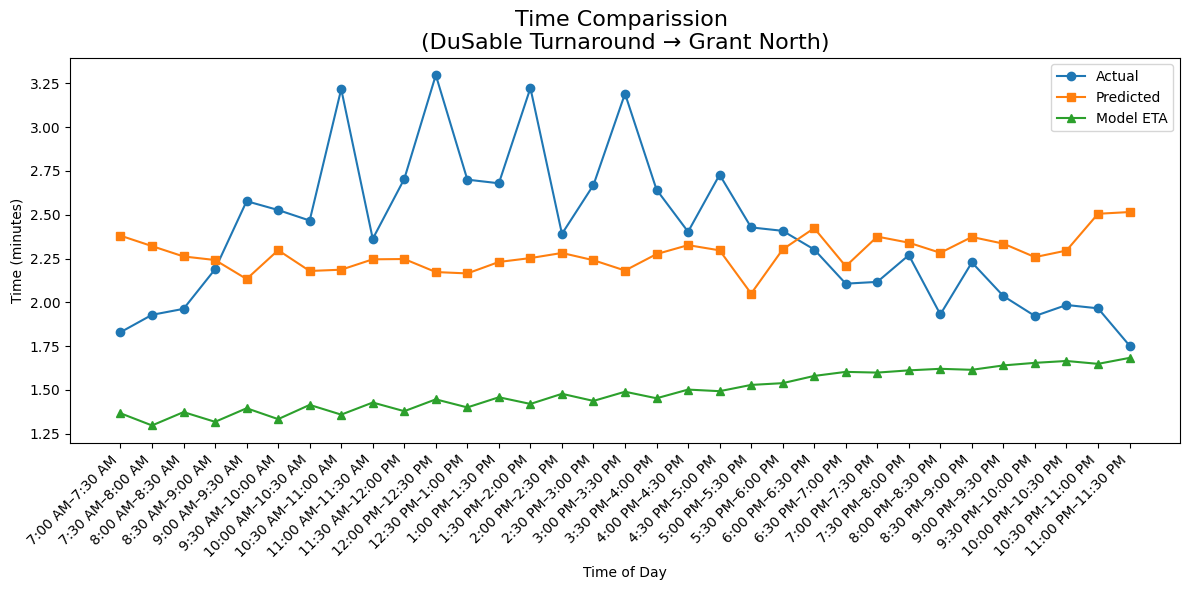

In [54]:
# Multi Line graph
start_stop = 820
end_stop = 466

pdf = mega_predset.to_pandas()

segment = pdf[
    (pdf["lastStopID"] == start_stop) &
    (pdf["nextStopID_actual"] == end_stop)
].copy()

segment = segment.dropna(subset=["timeDiff", "predictedDiff", "receiveTime"])

segment["timeDiff_sec"] = segment["timeDiff"].dt.total_seconds()
segment["predictedDiff_sec"] = segment["predictedDiff"].dt.total_seconds()
segment["model_eta_sec"] = segment.apply(predict_model_eta, axis=1)
segment["model_eta_min"] = segment["model_eta_sec"] / 60
segment["receiveTime"] = pd.to_datetime(segment["receiveTime"], errors="coerce")
segment["hour"] = segment["receiveTime"].dt.hour + segment["receiveTime"].dt.minute / 60

# Drop rows where receiveTime conversion failed
segment = segment.dropna(subset=["receiveTime"])

# Bin into 30-minute chunks
bins = np.arange(7, 24, 0.5)  # from 7 AM to midnight
labels = [
    f"{to_ampm_label(start)}–{to_ampm_label(end)}"
    for start, end in zip(bins[:-1], bins[1:])
]
segment["time_bin"] = pd.cut(segment["hour"], bins=bins, labels=labels, right=False)

# Convert time differences to minutes
segment["timeDiff_min"] = segment["timeDiff"].dt.total_seconds() / 60
segment["predictedDiff_min"] = segment["predictedDiff"].dt.total_seconds() / 60

# Aggregate average segment times per bin
grouped = segment.groupby("time_bin").agg({
    "timeDiff_min": "mean",
    "predictedDiff_min": "mean",
    "model_eta_min": "mean"
}).dropna()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped.index.astype(str), grouped["timeDiff_min"], label="Actual", marker='o')
plt.plot(grouped.index.astype(str), grouped["predictedDiff_min"], label="Predicted", marker='s')
plt.plot(grouped.index, grouped["model_eta_min"], label="Model ETA", marker='^')
plt.xticks(rotation=45, ha='right')
plt.title("Time Comparission \n(DuSable Turnaround → Grant North)", fontsize=16) 
plt.ylabel("Time (minutes)")
plt.xlabel("Time of Day")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

C:\Users\codin\AppData\Local\Temp\ipykernel_22668\2680627751.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = segment.groupby("time_bin").agg({


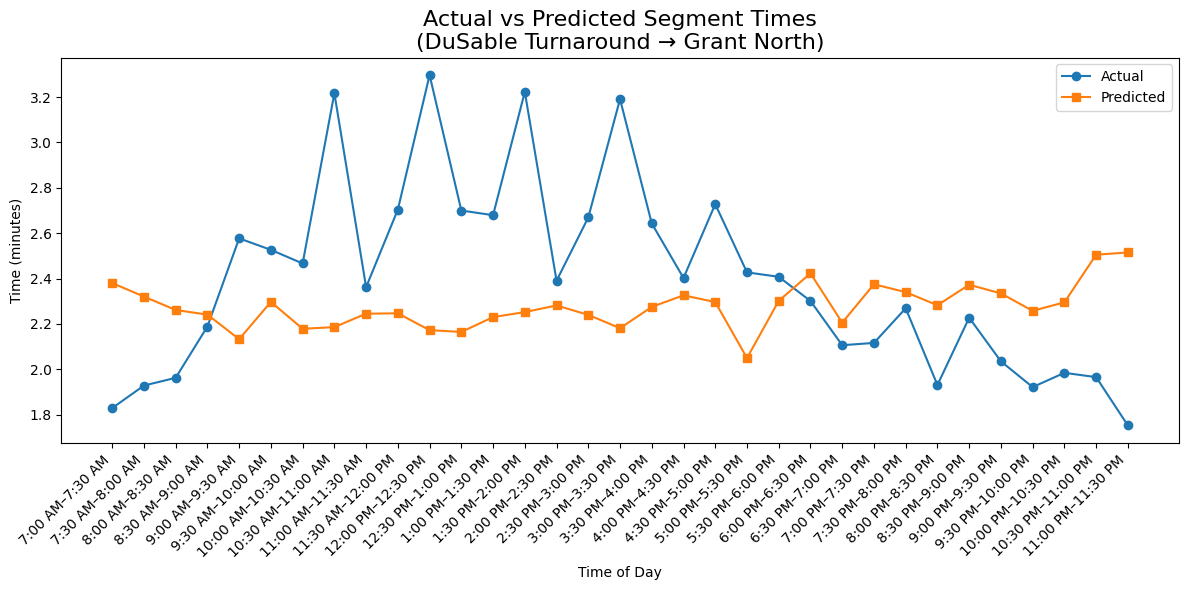

In [18]:
# Multi Line graph
start_stop = 820
end_stop = 466

pdf = mega_predset.to_pandas()

segment = pdf[
    (pdf["lastStopID"] == start_stop) &
    (pdf["nextStopID_actual"] == end_stop)
].copy()

segment = segment.dropna(subset=["timeDiff", "predictedDiff", "receiveTime"])

segment["timeDiff_sec"] = segment["timeDiff"].dt.total_seconds()
segment["predictedDiff_sec"] = segment["predictedDiff"].dt.total_seconds()
segment["receiveTime"] = pd.to_datetime(segment["receiveTime"], errors="coerce")
segment["hour"] = segment["receiveTime"].dt.hour + segment["receiveTime"].dt.minute / 60

# Drop rows where receiveTime conversion failed
segment = segment.dropna(subset=["receiveTime"])

# Bin into 30-minute chunks
bins = np.arange(7, 24, 0.5)  # from 7 AM to midnight
labels = [
    f"{to_ampm_label(start)}–{to_ampm_label(end)}"
    for start, end in zip(bins[:-1], bins[1:])
]
segment["time_bin"] = pd.cut(segment["hour"], bins=bins, labels=labels, right=False)

# Convert time differences to minutes
segment["timeDiff_min"] = segment["timeDiff"].dt.total_seconds() / 60
segment["predictedDiff_min"] = segment["predictedDiff"].dt.total_seconds() / 60

# Aggregate average segment times per bin
grouped = segment.groupby("time_bin").agg({
    "timeDiff_min": "mean",
    "predictedDiff_min": "mean"
}).dropna()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(grouped.index.astype(str), grouped["timeDiff_min"], label="Actual", marker='o')
plt.plot(grouped.index.astype(str), grouped["predictedDiff_min"], label="Predicted", marker='s')
plt.xticks(rotation=45, ha='right')
plt.title("Actual vs Predicted Segment Times\n(DuSable Turnaround → Grant North)", fontsize=16) 
plt.ylabel("Time (minutes)")
plt.xlabel("Time of Day")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [19]:
# Decode the polyline → list of (lat, lng) tuples
enc_line = two_l_pattern.select("encLine").to_series()[0]
path_points = polyline.decode(enc_line)
lats, lngs = zip(*path_points)

In [20]:
path_array = np.array(path_points)

array([[ 41.93571, -88.76717],
       [ 41.93578, -88.76717],
       [ 41.93595, -88.76718],
       [ 41.93642, -88.76718],
       [ 41.93642, -88.76818],
       [ 41.93642, -88.76922],
       [ 41.93643, -88.7702 ],
       [ 41.93643, -88.77041],
       [ 41.93643, -88.77065],
       [ 41.93603, -88.77051],
       [ 41.9358 , -88.77041],
       [ 41.93556, -88.77041],
       [ 41.93541, -88.77046],
       [ 41.93523, -88.77054],
       [ 41.93507, -88.77061],
       [ 41.9349 , -88.7706 ],
       [ 41.93477, -88.77055],
       [ 41.93469, -88.77037],
       [ 41.93468, -88.77023],
       [ 41.93472, -88.7701 ],
       [ 41.93481, -88.77   ],
       [ 41.93494, -88.76995],
       [ 41.93507, -88.76999],
       [ 41.93532, -88.77011],
       [ 41.9356 , -88.77029],
       [ 41.936  , -88.77047],
       [ 41.93642, -88.77061],
       [ 41.93638, -88.77397],
       [ 41.9364 , -88.77528],
       [ 41.9365 , -88.7754 ],
       [ 41.93701, -88.77538],
       [ 41.93746, -88.7754 ],
       [

In [21]:
def fast_find_closest_index(coord, path_array):
    lat, lon = coord
    dists = np.linalg.norm(path_array - np.array([lat, lon]), axis=1)
    return np.argmin(dists)

In [22]:
predSet['timeDiff'].to_list()

[datetime.timedelta(seconds=40),
 datetime.timedelta(seconds=60),
 datetime.timedelta(seconds=80),
 datetime.timedelta(seconds=51),
 datetime.timedelta(seconds=40),
 datetime.timedelta(seconds=30),
 datetime.timedelta(seconds=30),
 datetime.timedelta(seconds=140),
 datetime.timedelta(seconds=70),
 datetime.timedelta(seconds=60),
 datetime.timedelta(seconds=60),
 datetime.timedelta(seconds=20),
 datetime.timedelta(seconds=70),
 datetime.timedelta(seconds=50),
 datetime.timedelta(seconds=40),
 datetime.timedelta(seconds=40),
 datetime.timedelta(seconds=71),
 datetime.timedelta(seconds=47104),
 datetime.timedelta(seconds=41),
 datetime.timedelta(seconds=50),
 datetime.timedelta(seconds=70),
 datetime.timedelta(seconds=70),
 datetime.timedelta(seconds=30),
 datetime.timedelta(seconds=20),
 datetime.timedelta(seconds=40),
 datetime.timedelta(seconds=151),
 datetime.timedelta(seconds=120),
 datetime.timedelta(seconds=30),
 datetime.timedelta(seconds=50),
 datetime.timedelta(seconds=60),
 dat

In [23]:
predSet = predSet.drop_nulls(subset=["timeDiff", "predictedDiff"])

routeID,patternID,equipmentID,tripID,lat,lng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__,nextStopName,lastStopName,stopChanged,nextToLast,timeDiff,patternStopID,stopID,timePoint,minutes,time,status,schedule,scheduleNumber_right,statuscolor,direction_right,routeID_right,receiveTime_right,__index_level_0___right,scheduleStr,timeStr,predictedDiff
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,"datetime[ns, America/Chicago]",str,datetime[ns],cat,i64,i64,i64,f64,bool,i64,str,str,bool,bool,duration[ns],i64,i64,bool,i64,"datetime[μs, America/Chicago]",str,"datetime[μs, America/Chicago]",str,cat,cat,str,"datetime[ns, America/Chicago]",i64,str,str,duration[μs]
"""2L""",3,"""Old_1501""",329,41.93639,-88.7736,0,0,33,0,465,1145,10482,271,433,10481,"""19:00:00-2""",true,-2.0,11414,2024-08-31 19:04:41 CDT,"""354676050595540""",2024-09-01 00:04:48,"""Outbound""",4,433,465,0.0,true,538,"""Stadium Dr. at New Hall""","""Lincoln Hall""",true,true,40s,10482,465,false,0,2024-08-31 19:05:00 CDT,"""07:05PM""",2024-08-31 19:03:00 CDT,"""19:00:00-2""","""#39B139""","""Outbound""","""2L""",2024-08-31 19:04:41 CDT,740,"""07:03PM""","""07:05PM""",19s
"""2L""",3,"""Old_1501""",329,41.93746,-88.7754,0,0,33,0,466,1146,10483,0,465,10482,"""19:00:00-2""",true,-2.0,11414,2024-08-31 19:05:21 CDT,"""354676050595540""",2024-09-01 00:05:33,"""Outbound""",5,465,466,0.0,true,619,"""Grant North""","""Stadium Dr. at New Hall""",true,true,1m,10483,466,false,1,2024-08-31 19:06:00 CDT,"""07:06PM""",2024-08-31 19:04:00 CDT,"""19:00:00-2""","""#39B139""","""Outbound""","""2L""",2024-08-31 19:05:21 CDT,845,"""07:04PM""","""07:06PM""",39s
"""2L""",3,"""Old_1501""",329,41.93859,-88.77699,0,0,33,0,467,1147,10484,270,466,10483,"""19:00:00-2""",true,-2.0,11414,2024-08-31 19:06:21 CDT,"""354676050595540""",2024-09-01 00:06:34,"""Outbound""",6,466,467,0.0,true,727,"""Stevenson North""","""Grant North""",true,true,1m 20s,10484,467,true,1,2024-08-31 19:06:00 CDT,"""07:06PM""",2024-08-31 19:05:00 CDT,"""19:00:00-2""","""#39B139""","""Outbound""","""2L""",2024-08-31 19:06:21 CDT,985,"""07:05PM""","""07:06PM""",-21s
"""2L""",3,"""Old_1501""",329,41.93785,-88.77995,0,0,33,0,468,1148,10485,270,467,10484,"""19:00:00-2""",true,-2.0,11414,2024-08-31 19:07:41 CDT,"""354676050595540""",2024-09-01 00:07:50,"""Outbound""",7,467,468,3.04295,true,862,"""Stevenson South""","""Stevenson North""",true,true,51s,10485,468,false,0,2024-08-31 19:08:00 CDT,"""07:08PM""",2024-08-31 19:06:00 CDT,"""19:00:00-2""","""#39B139""","""Outbound""","""2L""",2024-08-31 19:07:41 CDT,1160,"""07:06PM""","""07:08PM""",19s
"""2L""",3,"""Old_1501""",329,41.93645,-88.78108,0,0,33,0,436,1149,10486,182,468,10485,"""19:00:00-2""",true,-2.0,11414,2024-08-31 19:08:32 CDT,"""354676050595540""",2024-09-01 00:08:35,"""Outbound""",8,468,436,0.0,true,943,"""Convocation Center Entrance 3""","""Stevenson South""",true,true,40s,10486,436,false,0,2024-08-31 19:09:00 CDT,"""07:09PM""",2024-08-31 19:07:00 CDT,"""19:00:00-2""","""#39B139""","""Outbound""","""2L""",2024-08-31 19:08:32 CDT,1265,"""07:07PM""","""07:09PM""",28s
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2L""",3,"""1002""",null,41.93407,-88.76318,0,0,0,0,447,1130,10497,359,446,10496,"""18:30:00-2""",true,-1.0,11380,2024-09-30 18:49:15 CDT,"""3546760508796c6""",2024-09-30 23:49:22,"""Outbound""",19,446,447,0.0,true,32792,"""Gilbert Way at Art Building""","""Castle Dr. at College Ave.""",true,true,1m 10s,10497,447,false,1,2024-09-30 18:50:00 CDT,"""06:50PM""",2024-09-30 18:49:00 CDT,"""18:30:00-2""","""#39B139""","""Outbound""","""2L""",2024-09-30 18:49:15 CDT,96366,"""06:49PM""","""06:50PM""",45s
"""2L""",3,"""1002""",null,41.93535,-88.76217,0,0,0,0,448,1133,10498,0,447,10497,

C:\Users\codin\AppData\Local\Temp\ipykernel_22668\587839455.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("viridis")


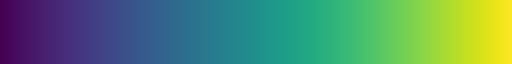

In [30]:
# Normalize predictedDiffs for colormap scaling
predicted_seconds = [td.total_seconds() for td in predSet["predictedDiff"].to_list()]
norm = TwoSlopeNorm(vmin=0, vcenter=5, vmax=120)
cmap = get_cmap("viridis")

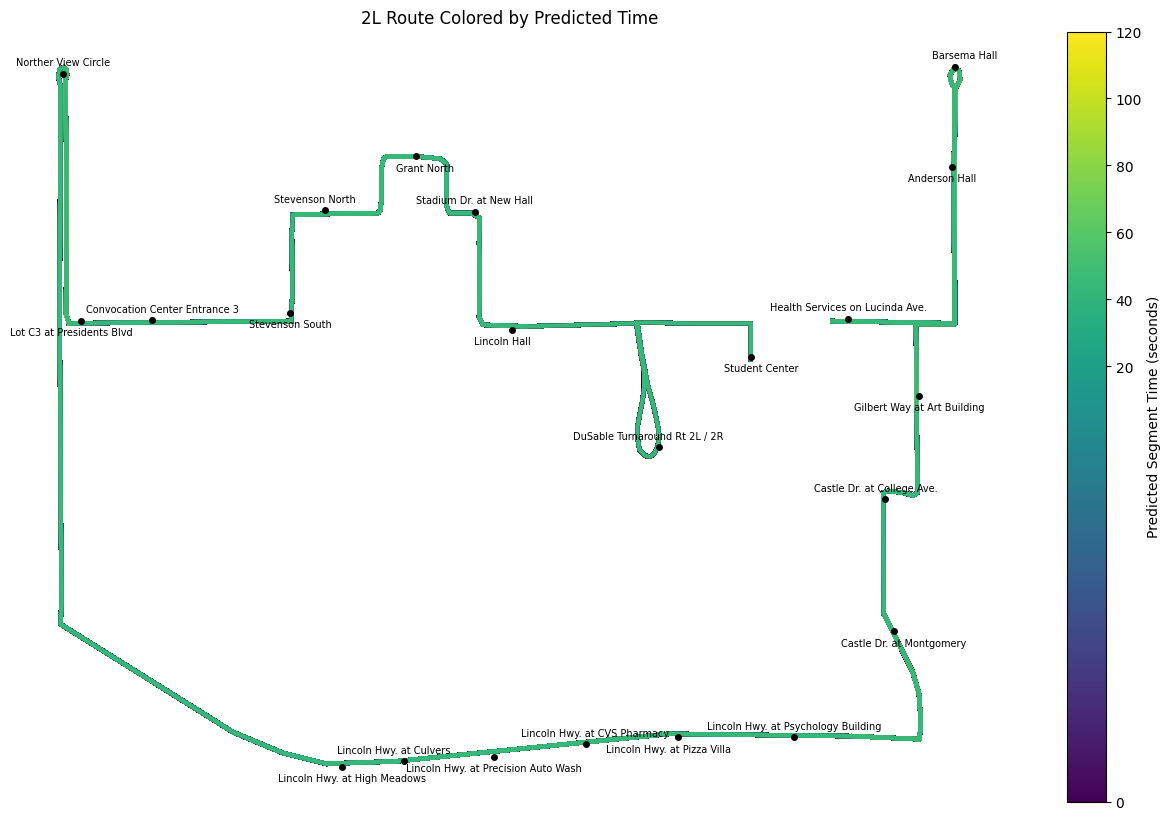

In [38]:
fig, ax = plt.subplots(figsize=(16, 10))

# Draw each predicted segment along actual polyline path
for row in predSet.iter_rows(named=True):
    start = row["lastStopName"]
    end = row["nextStopName"]
    if start in stop_pos and end in stop_pos:
        coord_start = stop_pos[start][1], stop_pos[start][0]
        coord_end = stop_pos[end][1], stop_pos[end][0]
        idx_start = fast_find_closest_index(coord_start, path_array)
        idx_end = fast_find_closest_index(coord_end, path_array)

        # Ensure proper slicing order
        i, j = sorted([idx_start, idx_end])
        segment = path_points[i:j+1]

        if len(segment) > 1:
            xs, ys = zip(*[(lon, lat) for lat, lon in segment])
            color = cmap(norm(row["predictedDiff"].total_seconds()))
            ax.plot(xs, ys, color=color, linewidth=3)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(predicted_seconds)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Predicted Segment Time (seconds)")

for i, (name, (lon, lat)) in enumerate(stop_pos.items()):
    ax.plot(lon, lat, marker='o', color='black', markersize=4, zorder=3)
    offset_x = 0.0003 * ((i % 3) - 1)
    offset_y = 0.0003 * ((i % 2) - 0.5)
    ax.text(lon + offset_x, lat + offset_y, name, fontsize=7, ha='center', va='center', zorder=4)
    
# Final plot tweaks
ax.set_title("2L Route Colored by Predicted Time")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis("off")
plt.show()

In [26]:
# plt.figure(figsize=(16, 8))
# plt.plot(lngs, lats, 'k-', linewidth=2, label="2L Route Path")

# stop_lats = ordered_stops["lat"].to_list()
# stop_lngs = ordered_stops["lng"].to_list()
# stop_names = ordered_stops["stop_name"].to_list()

# plt.plot(stop_lngs, stop_lats, 'ro', markersize=4, label="Stops")

# # Improved label spacing to prevent overlaps
# for i, (lat, lng, name) in enumerate(zip(stop_lats, stop_lngs, stop_names)):
#     offset_x = 0.0003 if i % 2 == 0 else -0.0003
#     offset_y = 0.0002 if i % 3 == 0 else -0.0002
#     ha = 'left' if offset_x > 0 else 'right'
#     va = 'bottom' if offset_y > 0 else 'top'
#     plt.text(lng + offset_x, lat + offset_y, name, fontsize=8, ha=ha, va=va)

# # === Final Touches ===
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("Route 2L")
# plt.grid(False)
# plt.axis('off')
# plt.tight_layout()
# plt.legend()
# plt.show()